$$Project Title: Customer Churn Analysis and Prediction$$

## 🧩 Task 3: Customer Segmentation

#### Objective:

- To segment customers based on key attributes — tenure, monthly charges, and contract type — and analyze churn behavior within each segment.

- The goal is to identify high-value customers who are at risk of churning and might require special attention or retention strategies.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

sns.set(style="whitegrid", palette="Set2")

### 1️⃣ Load the dataset

- Analysis: Load & Prepare Data
- Purpose: Selected tenure, monthly charges, and contract type

In [47]:
# Load dataset
data = pd.read_csv(r"C:\Users\Dell\OneDrive\Saiket Systems\Telco_Customer_Churn_Dataset.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
# Convert categorical variable 'Contract' to numeric
le = LabelEncoder()
data['Contract_num'] = le.fit_transform(data['Contract'])
data['Contract_num']

0       0
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    2
Name: Contract_num, Length: 7043, dtype: int32

In [18]:
# Keep relevant features for segmentation
seg_data = data[['tenure', 'MonthlyCharges', 'Contract_num']]
seg_data

,tenure,MonthlyCharges,Contract_num
0,1,29.85,0
1,34,56.95,1
2,2,53.85,0
3,45,42.30,1
4,2,70.70,0
...,...,...,...
7038,24,84.80,1
7039,72,103.20,1
7040,11,29.60,0
7041,4,74.40,0


In [20]:
print("🔹 Data Used for Segmentation:")
print(seg_data.head())

🔹 Data Used for Segmentation:
   tenure  MonthlyCharges  Contract_num
0       1           29.85             0
1      34           56.95             1
2       2           53.85             0
3      45           42.30             1
4       2           70.70             0


### 2️⃣ K-Means Clustering

- Analysis: Apply K-Means
- Purpose: Divided customers into 4 behavioral clusters

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(seg_data)
data['Cluster']

0       3
1       0
2       3
3       0
4       2
       ..
7038    2
7039    1
7040    3
7041    2
7042    1
Name: Cluster, Length: 7043, dtype: int32

### 3️⃣ Visualize the Segments

- Analyis: Visualiza Segments
- Purpose: Scatter plot shows customer groups
- Visualization: Scatter plot

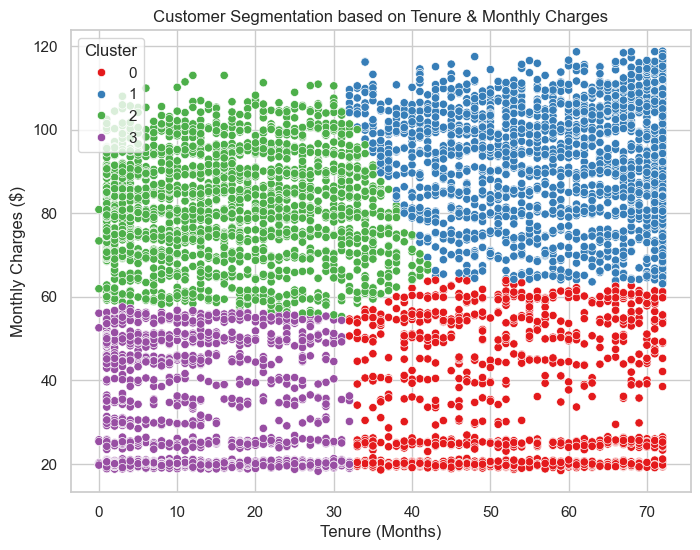

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation based on Tenure & Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.show()

### 4️⃣ Analyze Churn Rates in Each Segment

- Analysis: Churn Analysis
- Purpose: Found churn % in each segment
- Visualization: Bar chart


🔹 Churn Rate by Customer Segment (%):
 Churn           No        Yes
Cluster                      
0        95.229835   4.770165
1        84.073507  15.926493
2        50.868373  49.131627
3        75.502008  24.497992


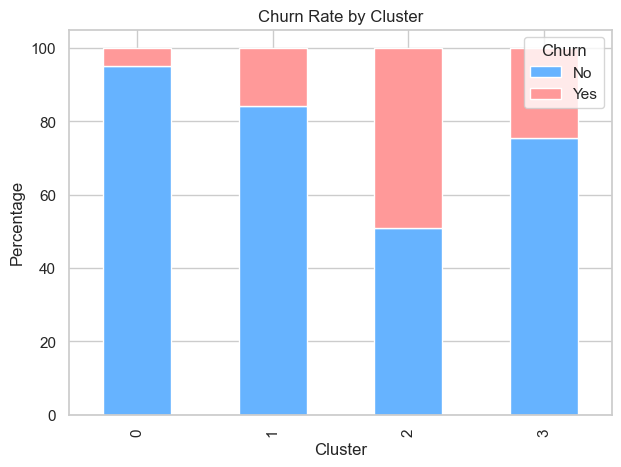

In [33]:
churn_by_cluster = data.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
print("\n🔹 Churn Rate by Customer Segment (%):\n", churn_by_cluster)

# Visualization
churn_by_cluster.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#66b3ff', '#ff9999'])
plt.title('Churn Rate by Cluster')
plt.ylabel('Percentage')
plt.show()

### 5️⃣ Identify High-Value At-Risk Customers

- Analysis:Identify High-Value At-Risk
- Purpose: Filtered customers with high spend but churned

In [36]:
# High-value = high monthly charges
# At-risk = churned == "Yes"
high_value_risk = data[(data['MonthlyCharges'] > data['MonthlyCharges'].quantile(0.75)) & (data['Churn'] == 'Yes')]

print("\n🔹 High-Value At-Risk Customers:")
print(high_value_risk[['customerID', 'tenure', 'MonthlyCharges', 'Contract', 'Churn']].head())


🔹 High-Value At-Risk Customers:
    customerID  tenure  MonthlyCharges        Contract Churn
5   9305-CDSKC       8           99.65  Month-to-month   Yes
8   7892-POOKP      28          104.80  Month-to-month   Yes
13  0280-XJGEX      49          103.70  Month-to-month   Yes
26  6467-CHFZW      47           99.35  Month-to-month   Yes
38  5380-WJKOV      34          106.35  Month-to-month   Yes


### 6️⃣ Insights & Summary

- Analysis: Cluster Summary
- Purpose: Summarized average values per cluster

In [39]:
# Cluster Characteristics
cluster_summary = data.groupby('Cluster')[['tenure', 'MonthlyCharges']].mean().round(2)
print("\n🔹 Average Tenure & Charges by Cluster:")
print(cluster_summary)


🔹 Average Tenure & Charges by Cluster:
         tenure  MonthlyCharges
Cluster                        
0         54.17           33.96
1         58.58           93.28
2         14.78           81.06
3         10.57           32.62


In [49]:
# ✅ End of Task 3
print("\n✅ Customer Segmentation Completed Successfully!")


✅ Customer Segmentation Completed Successfully!
